# Extração de dados

In [5]:
import requests
import json
from bs4 import BeautifulSoup
import scrapy

* Library Requests

In [6]:
r = requests.get('https://quotes.toscrape.com/')
texto_html = r.text

In [7]:
r.status_code # 200 = OK, https://www.httpstatus.com.br para ver todas as saídas

200

In [8]:
r.encoding # para verificar o tipo de enconding do conteúdo (ex: UTF-8, ASCII, UTF-16)

'utf-8'

In [11]:
# Objetivo: capturar frase e autor + salvar em um arquivo .txt
# para capturar as frases, <span class="text" itemprop="text"> é a proxy de busca
# para capturar as autores, <span>by <small class="author" itemprop="author"> é a proxy de busca

with open('frases_autores.txt', 'w') as file:
    for linha in texto_html.split('\n'):
            if '<span class="text" itemprop="text">“' in linha:
                frase = linha.replace('<span class="text" itemprop="text">“', '').replace('”</span>', '').strip()
           
            if '<span>by <small class="author" itemprop="author">' in linha:
                autor = linha.replace('<span>by <small class="author" itemprop="author">', '').replace('</small>', '').strip()
                    
                print(f'{autor}: {frase}')
                print('-' * 100)
                file.write(autor + ", " + frase)
                file.write("\n")

Albert Einstein: The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.
----------------------------------------------------------------------------------------------------
J.K. Rowling: It is our choices, Harry, that show what we truly are, far more than our abilities.
----------------------------------------------------------------------------------------------------
Albert Einstein: There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.
----------------------------------------------------------------------------------------------------
Jane Austen: The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.
----------------------------------------------------------------------------------------------------
Marilyn Monroe: Imperfection is beauty, madness is genius and it&#39;s better to be absolutely ridiculou

* Requests + Beautiful Soup

In [12]:
r = requests.get('https://www.adorocinema.com/filmes/melhores/genero-13008/')

In [13]:
r.status_code

200

In [14]:
# BS captura o html como uma árvore, onde podemos consultar os dados necessários
# BS vs Py requests: PR extrai mas não organiza os dados, BS faz ambos

texto_html = r.text
bs_text = BeautifulSoup(texto_html, 'html.parser')

In [15]:
# Ex1: visualizando todos os trechos com a tag 'p' 
bs_text.findAll('p')

[<p class="header-search-extralinks">
 Ex.:
 <a href="/filmes/filme-296168/">Oppenheimer</a>, <a href="/filmes/filme-287126/">Napoleão</a>, <a href="/filmes/filme-270935/">Missão Impossível 7</a> </p>,
 <p class="from">de
 Wes Ball </p>,
 <p class="with">com
 Freya Allan, Owen Teague </p>,
 <p class="genre"> Filme - Ação </p>,
 <p class="info">
 <span class="ACrL3NACrlcnZpY29zL2ZlZWRiYWNrLw==" rel="noopener" target="_blank">Queremos sua opinião!</span> <span class="pipe">|</span>
 <span class="ACrL3NACrlcnZpY29zL3NvYnJlLW5vcy8=">Sobre o AdoroCinema</span> <span class="pipe">|</span>
 <span class="ACrL3NACrlcnZpY29zL2VudHJlLWVtLWNvbnRhdG8tY29ub3Njby8=">Contato</span> <span class="pipe">|</span>
 <span class="ACrL3NACrlcnZpY29zL2NvbmRpY29lcy8=">Termos e condições</span> <span class="pipe">|</span>
 <span class="ACrL3NACrlcnZpY29zL3BvbGl0aWNhLXByaXZhY2lkYWRlLw==">Política de privacidade</span> <span class="pipe">|</span> ©AdoroCinema
 </p>,
 <p class="info-logo">
 <i class="sp footer-logo

In [17]:
# cada tag pode ser acessada de forma estruturada e seus atributos podem ser acessados em um dict. Ex2: atributos da tag 'span' 
span_text = bs_text.span
span_text

<span class="ACrLw=ACr= header-main-logo">
<img alt="adorocinema" class="header-main-logo-img" height="24" src="https://assets.adorocinema.com/skin/img/adorocinema/logo-main.c656a66e.svg" width="210"/>
<span class="header-main-logo-name">AdoroCinema</span>
</span>

In [18]:
span_text.attrs

{'class': ['ACrLw=ACr=', 'header-main-logo']}

In [21]:
# Ex2: extraindo a lista de melhores filmes do site
for tag in bs_text.findAll('img'):
    print(tag)

<img alt="adorocinema" class="header-main-logo-img" height="24" src="https://assets.adorocinema.com/skin/img/adorocinema/logo-main.c656a66e.svg" width="210"/>


<img alt=" O Poderoso Chefão" class="thumbnail-img" height="420" src="https://br.web.img3.acsta.net/c_310_420/medias/nmedia/18/90/93/20/20120876.jpg" width="310"/>
<img alt=" A Lista de Schindler" class="thumbnail-img" height="420" src="https://br.web.img3.acsta.net/c_310_420/pictures/19/04/10/19/44/2904073.jpg" width="310"/>
<img alt=" Um Sonho de Liberdade" class="thumbnail-img" data-src="https://br.web.img3.acsta.net/c_310_420/medias/nmedia/18/90/16/48/20083748.jpg" height="420" src="data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAAACH5BAEAAAAALAAAAAADAAQAAAIDhI9WADs=" width="310"/>
<img alt=" Forrest Gump - O Contador de Histórias" class="thumbnail-img" data-src="https://br.web.img3.acsta.net/c_310_420/medias/nmedia/18/87/30/21/19874092.jpg" height="420" src="data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAAACH5BAEAAAAALAAAAAADAA

> No site, há imagens tanto para a lista principal de filmes quanto para outros conteúdos de filmes, e, pode-se observar um padrão em que a _width_ dos filmes de interesse é de 310. Portanto, essa será a proxy para extração dos títulos.

In [23]:
# melhores filmes, de acordo com a primeira página do site
for tag in bs_text.findAll('img', {'class': 'thumbnail-img', 'width': '310'}):
    print(tag['alt'])

 O Poderoso Chefão
 A Lista de Schindler
 Um Sonho de Liberdade
 Forrest Gump - O Contador de Histórias
 À Espera de um Milagre
 A Vida é Bela
 O Poderoso Chefão 2
 O Resgate do Soldado Ryan
 O Silêncio dos Inocentes
 Intocáveis


> Agora, basta adaptar o _script_ para que percorra todas as páginas

In [27]:
# Objetivo: extrair o título dos melhores filmes do site: Adoro Cinema (website do modelo paginado)
n = 1
for i in range(1, 31): # a quantidade de pgs é adaptável, pode ser consultada ao acessar o site
    r = requests.get(f'https://www.adorocinema.com/filmes/melhores/genero-13008/?page={i}')
    texto_html = r.text
    bs_text = BeautifulSoup(texto_html, 'html.parser')
    
    with open('melhores_filmes_adoro_cinema.txt', 'a', encoding='utf-8') as file:
        for tag in bs_text.findAll('img', {'class': 'thumbnail-img', 'width': '310'}):
            print(f"{n}. {tag['alt']}")
            file.write(tag['alt'])
            file.write("\n")
            n += 1

1.  O Poderoso Chefão
2.  A Lista de Schindler
3.  Um Sonho de Liberdade
4.  Forrest Gump - O Contador de Histórias
5.  À Espera de um Milagre
6.  A Vida é Bela
7.  O Poderoso Chefão 2
8.  O Resgate do Soldado Ryan
9.  O Silêncio dos Inocentes
10.  Intocáveis
11.  Homens de Honra
12.  Sempre ao Seu Lado
13.  Interestelar
14.  À Procura da Felicidade
15.  Histórias Cruzadas
16.  O Sexto Sentido
17.  Coringa
18.  Até o Último Homem
19.  O Pianista
20.  Seven - Os Sete Crimes Capitais
21.  Cidade de Deus
22.  Ben-Hur
23.  Coração Valente
24.  Extraordinário
25.  Tempos Modernos
26.  Titanic
27.  Os Bons Companheiros
28.  12 Anos de Escravidão
29.  Diário de uma Paixão
30.  A Noviça Rebelde
31.  Som da Liberdade
32.  Clube da Luta
33.  O Menino do Pijama Listrado
34.  O Poderoso Chefão 3
35.  Tropa de Elite
36.  Sociedade dos Poetas Mortos
37.  O Quarto de Jack
38.  Pulp Fiction - Tempo de Violência
39.  ...E o Vento Levou
40.  Túmulo dos Vaga-Lumes
41.  A Paixão de Cristo
42.  Scarface
43

> Com uma breve checagem dos 3 últimos filmes apresentados no python e no site, vê-se que a extração foi bem sucedida

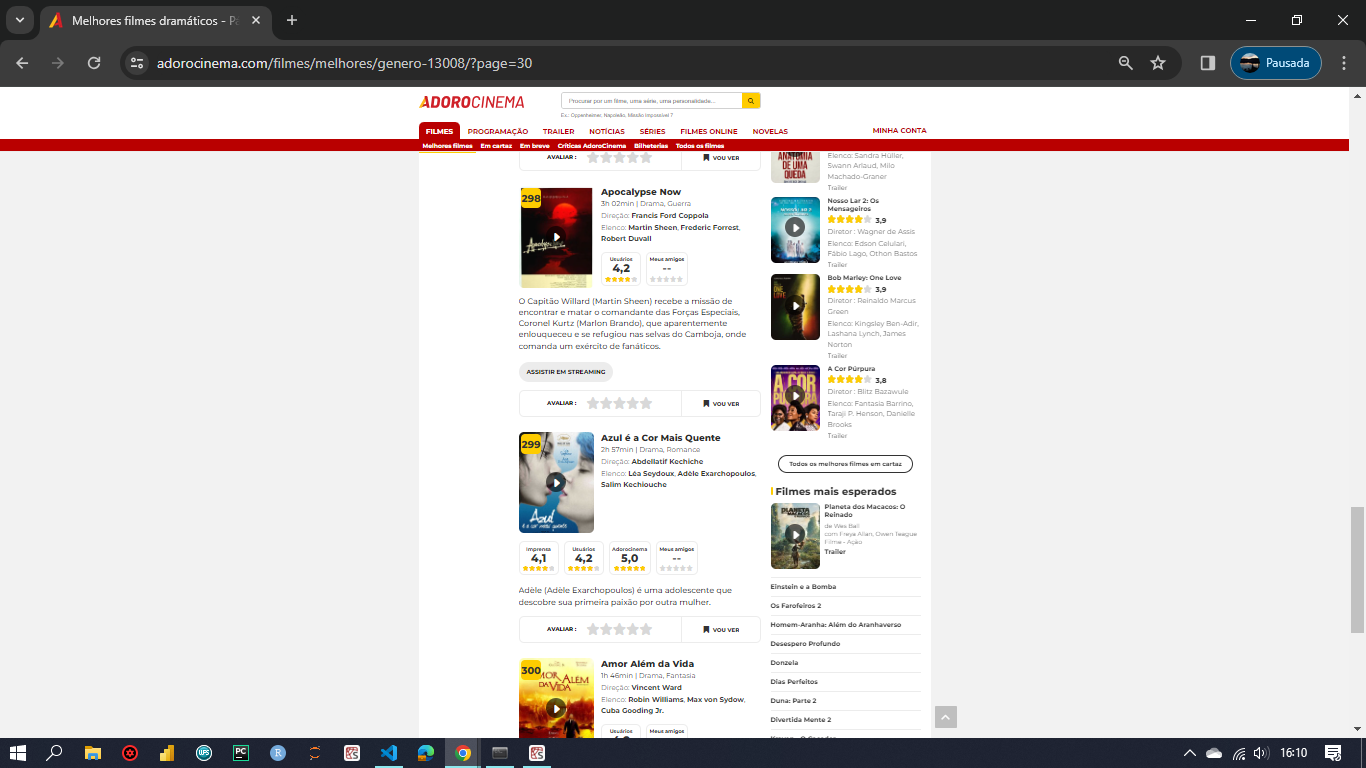